#### sklearn.preprocessing.PolynomialFeatures
class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 다항식
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]


In [4]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature: \n', poly_ftr)

변환된 2차 다항식 계수 feature: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [7]:
X = np.arange(20)

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

y = []
for i in X:
    data = polynomial_func(i)
    y.append(data)

In [10]:
list(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
y

[1,
 5,
 17,
 43,
 89,
 161,
 265,
 407,
 593,
 829,
 1121,
 1475,
 1897,
 2393,
 2969,
 3631,
 4385,
 5237,
 6193,
 7259]

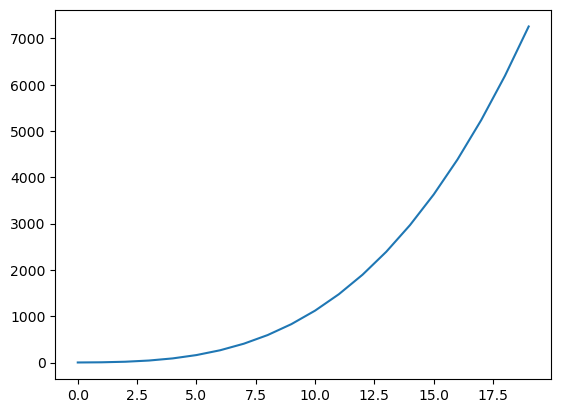

In [11]:
import matplotlib.pyplot as plt
plt.plot(X, y)


In [14]:
from sklearn.linear_model import LinearRegression
X_train = np.array(X).reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_train, y)
y_pred = lr.predict(X_train)

In [15]:
y_pred

array([-1389.8, -1038.4,  -687. ,  -335.6,    15.8,   367.2,   718.6,
        1070. ,  1421.4,  1772.8,  2124.2,  2475.6,  2827. ,  3178.4,
        3529.8,  3881.2,  4232.6,  4584. ,  4935.4,  5286.8])

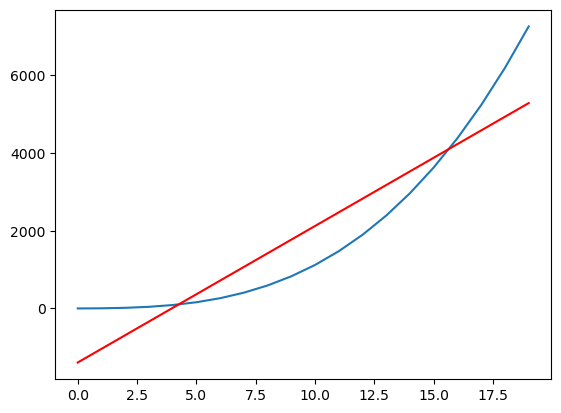

In [16]:
plt.plot(X, y)
plt.plot(X, y_pred, color = 'r')

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
poly_X_train = poly.fit_transform(X_train)

poly_X_train

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 1.400e+01, 1.960e+02, 2.744e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03],
       [1.000e+00, 1.600e+01, 2.560e+02, 4.096e+03],
       [1.000e+00, 1.700e+01, 2.890e+02, 4.913e+03],
       [1.000e+00, 1.800e+01, 3.240e+02, 5.832

In [26]:
lr.fit(poly_X_train, y)
y_pred = lr.predict(poly_X_train)
y_pred

array([1.000e+00, 5.000e+00, 1.700e+01, 4.300e+01, 8.900e+01, 1.610e+02,
       2.650e+02, 4.070e+02, 5.930e+02, 8.290e+02, 1.121e+03, 1.475e+03,
       1.897e+03, 2.393e+03, 2.969e+03, 3.631e+03, 4.385e+03, 5.237e+03,
       6.193e+03, 7.259e+03])

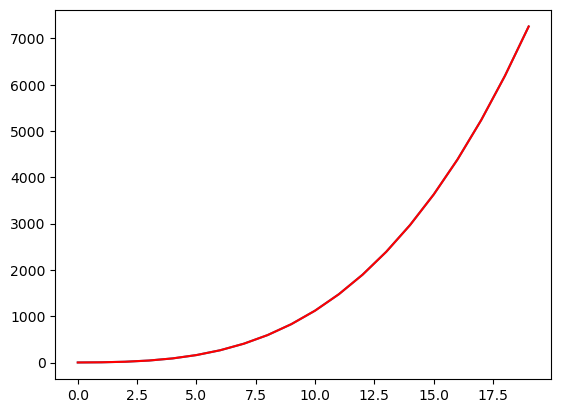

In [27]:
plt.plot(X, y)
plt.plot(X, y_pred, color = 'r')

In [28]:
lr.coef_    # 회귀계수

array([0., 2., 1., 1.])

#### sklearn.pipeline.Pipeline
class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
lr = LinearRegression()
poly = PolynomialFeatures(degree = 3)
model = Pipeline([('poly', poly), ('linear', lr)])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))
print(model.named_steps)

Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
{'poly': PolynomialFeatures(degree=3), 'linear': LinearRegression()}
